<a href="https://colab.research.google.com/github/mugivijaygovindraj/yolov8/blob/main/yolov8_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/data/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 123 images---


  0%|          | 0/99 [00:00<?, ?it/s]

------ Training data created with 80% split 99 images -------


  0%|          | 0/24 [00:00<?, ?it/s]

------ Testing data created with a total of 24 images ----------
------ TASK COMPLETED -------


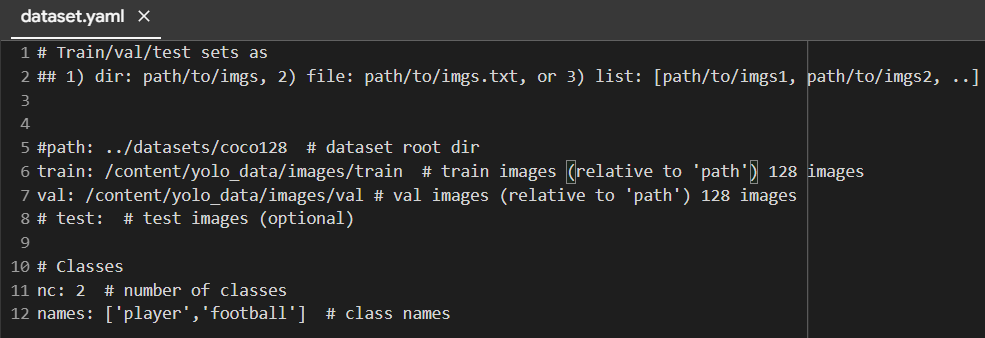

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.16 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.8/78.2 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/yolov8/training_results name=football

100% 21.5M/21.5M [00:00<00:00, 142MB/s]

Ultralytics YOLOv8.0.16 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/dataset.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=football, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, classes=None, format=torchscript, ker

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8/test_images

Ultralytics YOLOv8.0.16 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/9 /content/drive/MyDrive/yolov8/test_images/22d_f_195_6ty.jpg: 384x640 12 players, 15.5ms
image 2/9 /content/drive/MyDrive/yolov8/test_images/22d_f_440_54r.jpg: 384x640 1 player, 11.9ms
image 3/9 /content/drive/MyDrive/yolov8/test_images/22d_f_590_54r.jpg: 384x640 11.6ms
image 4/9 /content/drive/MyDrive/yolov8/test_images/54r_f_125_6ty.jpg: 384x640 13 players, 11.6ms
image 5/9 /content/drive/MyDrive/yolov8/test_images/54r_f_225_fre.jpg: 384x640 1 player, 11.6ms
image 6/9 /content/drive/MyDrive/yolov8/test_images/54r_f_95_rt3.jpg: 384x640 11 players, 11.6ms
image 7/9 /content/drive/MyDrive/yolov8/test_images/6ty_f_405_6ty.jpg: 384x640 3 players, 11.6ms
image 8/9 /content/drive/MyDrive/yolov8/test_images/fr_f_10_fre.jpg: 384x640 11 players, 1 football, 11.6ms
image 9/9 /content/drive/MyDrive/yolov8/test_images/we_f

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football/weights/best.pt conf=0.77 source=/content/drive/MyDrive/yolov8/vid2

Ultralytics YOLOv8.0.16 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/4 (1/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 15.4ms
video 1/4 (2/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 13.6ms
video 1/4 (3/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 13.1ms
video 1/4 (4/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 14.6ms
video 1/4 (5/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 24.4ms
video 1/4 (6/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 13.4ms
video 1/4 (7/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 13.0ms
video 1/4 (8/149) /content/drive/MyDrive/yolov8/vid2/5.mp4: 352x640 1 player, 1 football, 13.3ms
video 1/4 (9/149) /content/drive/MyDrive/yolov8/vid2/5.m

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/yolov8/output

In [ ]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt format=onnx

{'task': 'detect', 'mode': 'export', 'model': '/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt', 'data': None, 'epochs': 100, 'patience': 50, 'batch': 16, 'imgsz': 640, 'save': True, 'cache': False, 'device': None, 'workers': 8, 'project': None, 'name': None, 'exist_ok': False, 'pretrained': False, 'optimizer': 'SGD', 'verbose': False, 'seed': 0, 'deterministic': True, 'single_cls': False, 'image_weights': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'save_json': False, 'save_hybrid': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'show': False, 'save_txt': False, 'save_conf': False, 'save_crop': False, 'hide_labels': False, 'hide_conf': False, 'vid_stride': 1, 'line_thickness': 3, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'retina_masks': False, 'format': 'onnx', 'keras': False, 'opti